In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sb
import itertools
from wordcloud import WordCloud, STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
import folium
import folium.plugins
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
spaceData = pd.read_csv("spacex_launch_data.csv")
spaceData.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute)
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [3]:
spaceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
Flight Number        57 non-null object
Date                 57 non-null object
Time (UTC)           57 non-null object
Booster Version      57 non-null object
Launch Site          57 non-null object
Payload              57 non-null object
Payload Mass (kg)    55 non-null object
Orbit                57 non-null object
Customer             57 non-null object
Mission Outcome      57 non-null object
Landing Outcome      57 non-null object
dtypes: object(11)
memory usage: 5.0+ KB


### Data Dimensions

In [4]:
print("Number of columns :",spaceData.shape[1])
print("Number of rows    :",spaceData.shape[0])

Number of columns : 11
Number of rows    : 57


In [5]:
import datetime

spaceData["Date"]  = pd.to_datetime(spaceData["Date"],format="%Y-%m-%d")
spaceData["year"]  = pd.DatetimeIndex(spaceData["Date"]).year
spaceData["month"] = pd.DatetimeIndex(spaceData["Date"]).month
spaceData["month"] = spaceData["month"].map({1:"JAN",  2:"FEB",  3:"MAR",  4:"APR",  
                                               5:"MAY",  6:"JUN",
                                              7:"JUL",  8:"AUG",  9:"SEP", 10:"OCT",
                                               11:"NOV", 12:"DEC"})
spaceData["hour"]  = spaceData["Time (UTC)"].str.split(":").str[0]
spaceData["month_year"] = spaceData["month"].astype(str) + "-" + spaceData["year"].astype(str)

## Total Space-X launches by year

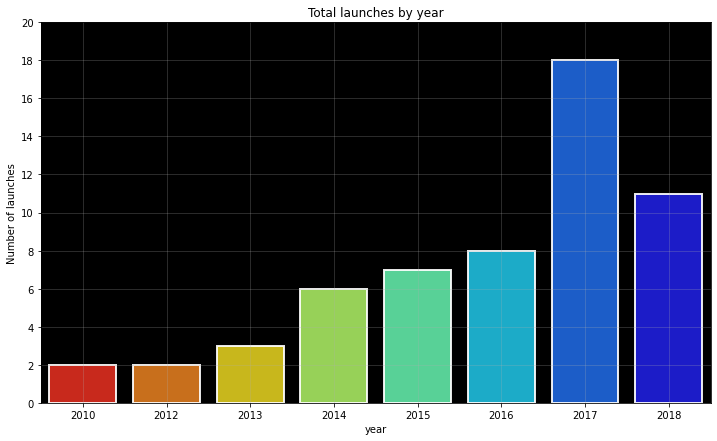

In [6]:
yr = spaceData.groupby("year")["Flight Number"].count().reset_index()

plt.figure(figsize=(12,7))
ax = sb.barplot("year","Flight Number",data=yr,
                 palette="jet_r",linewidth=2,
                 edgecolor=["white"]*len(yr),
                 alpha=.9)
ax.set_facecolor("k")
ax.set_ylabel("Number of launches")
plt.yticks(np.arange(0,22,2))
plt.title("Total launches by year")
plt.grid(True,alpha=.3)
plt.show()

1. Space X had maximum of 18 launches in the year 2017 .
2. No launches in the year 2011.

## Mission outcomes by year

C:\Users\Ritesh Bansal\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:185: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'

C:\Users\Ritesh Bansal\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:1208: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



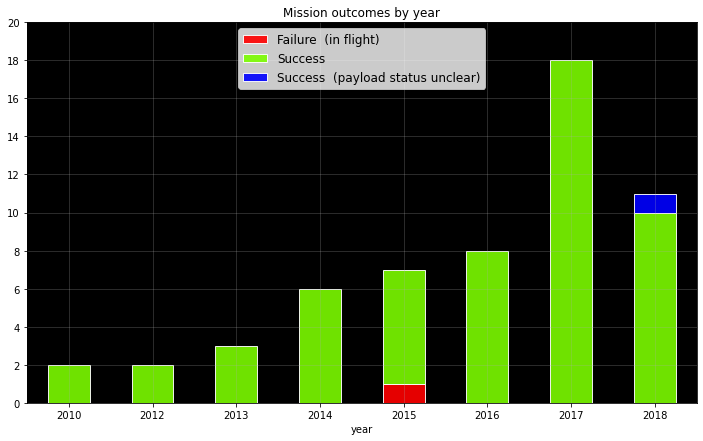

In [7]:
sy = pd.crosstab(spaceData["year"], spaceData["Mission Outcome"])
ax = sy.plot(kind="bar", stacked=True, figsize=(12,7),
             linewidth=1, edgecolor="w"*spaceData["year"].nunique(),
             colors=["r", "lawngreen", "b"], alpha=0.9)

plt.yticks(np.arange(0,22,2))
plt.grid(True,alpha=.3)
plt.title("Mission outcomes by year")
plt.legend(loc="upper center",prop={"size":12})
plt.xticks(rotation=0)
ax.set_facecolor("k")
plt.show()

1. Year 2015 have a mission failure during flight.
2. Since their first mission in June 2010, rockets from the Falcon 9 family have been launched 57 times, with 55 full mission successes, one partial failure and one total loss of spacecraft.

## Mission Success rate

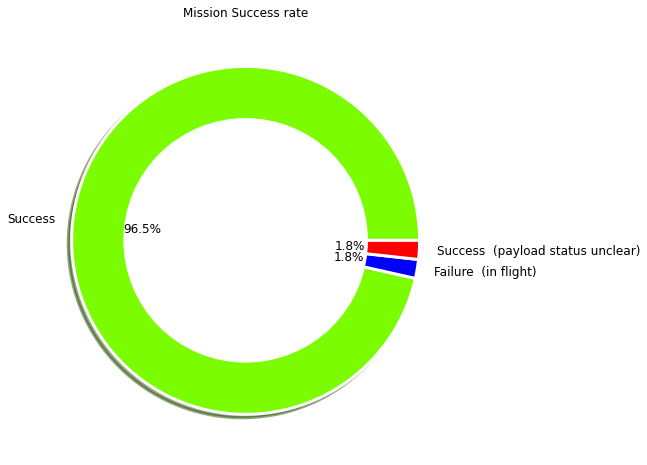

In [8]:
plt.figure(figsize=(8,8))
spaceData["Mission Outcome"].value_counts().plot.pie(autopct="%1.1f%%",
                                                     fontsize=12,
                                                     colors = ["lawngreen","b","r"],
                                                     wedgeprops={"linewidth":3,"edgecolor":"w"},
                                                     shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("Mission Success rate")
plt.show()

1. Rockets from the Falcon 9 family have been launched 57 times over 8 years, resulting in 55 full mission successes (96.5% success rate), one partial success , and one failure.

## Mission Failure

,launch_details,information
0,Flight Number,19
1,Date,2015-06-28 00:00:00
2,Time (UTC),14:21:00
3,Booster Version,F9 v1.1 B1018
4,Launch Site,CCAFS LC-40
5,Payload,SpaceX CRS-7
6,Payload Mass (kg),"1,952"
7,Orbit,LEO (ISS)
8,Customer,NASA (CRS)
9,Mission Outcome,Failure (in flight)


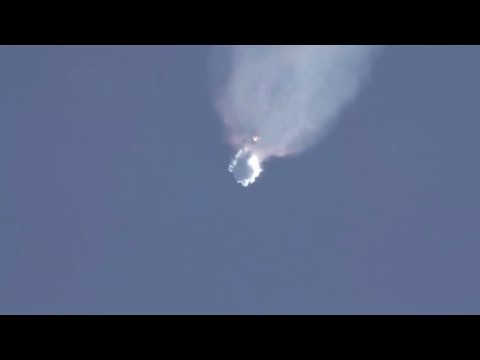

In [9]:
from IPython.display import YouTubeVideo
failure = spaceData[spaceData["Mission Outcome"] == "Failure  (in flight)"].transpose()[:12].reset_index()
failure.columns = ["launch_details","information"]
failure = failure.style.set_properties(**{'background-color': 'black',
                                         'color': 'lawngreen',
                                        'border-color': 'white'}).set_caption("Mission Failed")

display(failure)
YouTubeVideo("WTVkhp0MxMc",width=700,height=400)

1. Launch performance was nominal until an overpressure incident in the second-stage LOX tank, leading to vehicle breakup at T+150 seconds.
2. Dragon capsule survived the explosion but was lost upon splashdown as its software did not contain provisions for parachute deployment on launch vehicle failure.

## Mission payload status unclear

In [10]:
uc = spaceData[spaceData["Mission Outcome"] == "Success  (payload\xa0status unclear)"].transpose()[:12].reset_index()
uc.columns = ["launch_details", "information"]
uc = uc.style.set_properties(**{"background-color": "black",
                               "color": "yellow",
                               "border-color": "white"}).set_caption("Mission payload status unclear")
uc

,launch_details,information
0,Flight Number,47
1,Date,2018-01-08 00:00:00
2,Time (UTC),1:00:00
3,Booster Version,F9 B4 B1043.1
4,Launch Site,CCAFS SLC-40
5,Payload,Zuma
6,Payload Mass (kg),Classified
7,Orbit,LEO
8,Customer,Northrop Grumman
9,Mission Outcome,Success (payload status unclear)


## Launch Sites

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1627: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



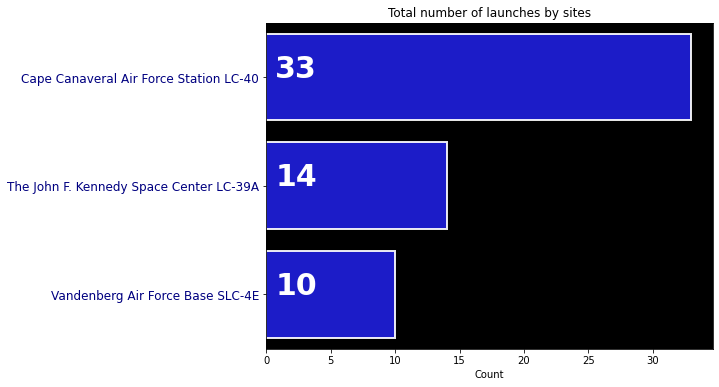

In [11]:
spaceData["Launch_site_f"] = spaceData["Launch Site"].map({"CCAFS LC-40" :"Cape Canaveral Air Force Station LC-40",
                                                            "CCAFS SLC-40" :"Cape Canaveral Air Force Station LC-40",
                                                            "KSC LC-39A"   :"The John F. Kennedy Space Center LC-39A",
                                                            "VAFB SLC-4E"  :"Vandenberg Air Force Base SLC-4E"})

plt.figure(figsize=(8,6))

ax = sb.countplot(y = spaceData["Launch_site_f"],palette=["b"],
                  order=spaceData["Launch_site_f"].value_counts().index,
                  linewidth=2,
                  edgecolor="w"*3,
                  alpha=.9)

ax.set_facecolor("k")
plt.ylabel("")
plt.xlabel("Count")
plt.yticks(color="navy",fontsize=12)
plt.title("Total number of launches by sites")

for i,j in enumerate(spaceData["Launch_site_f"].value_counts().values.ravel()):
    ax.text(.7,i,j,color="w",weight="bold",fontsize=30)

plt.show()

1. Cape Canaveral Air Force Station .Cape Canaveral Air Force Station Space Launch Complex 40 (SLC-40), previously Launch Complex 40 (LC-40) is a launch pad for rockets located at the north end of Cape Canaveral, Florida.
2. Launch Complex 39 (LC-39) is a rocket launch site at the John F. Kennedy Space Center on Merritt Island in Florida, United States.
3. Space Launch Complex 4 (SLC-4) is a launch and landing site at Vandenberg Air Force Base with two pads, both of which are used by SpaceX for Falcon 9 launch operations.

## Mission outcomes by Launching sites

C:\Users\Ritesh Bansal\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:1298: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



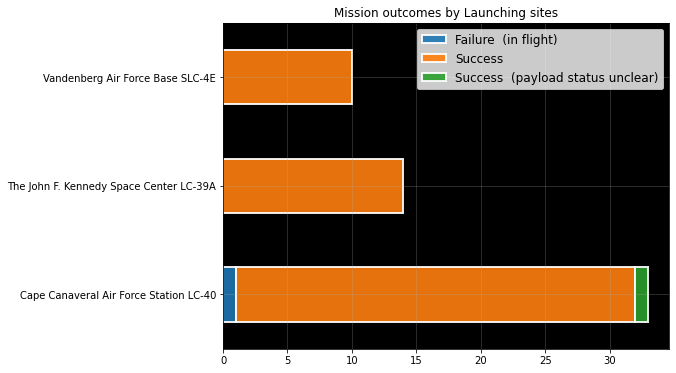

In [12]:
lm = pd.crosstab(spaceData["Launch_site_f"],spaceData["Mission Outcome"])

ax = lm.plot(kind="barh",stacked=True,figsize=(8,6),
            linewidth=2,
            edgecolor="w"*3,
            alpha = .9)

plt.grid(True,alpha=.3)
plt.title("Mission outcomes by Launching sites")
plt.legend(loc="upper right",prop={"size":12})
plt.xticks(rotation=0)
plt.ylabel("")
ax.set_facecolor("k")
plt.show()

## Launch sites by year

C:\Users\Ritesh Bansal\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:1208: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



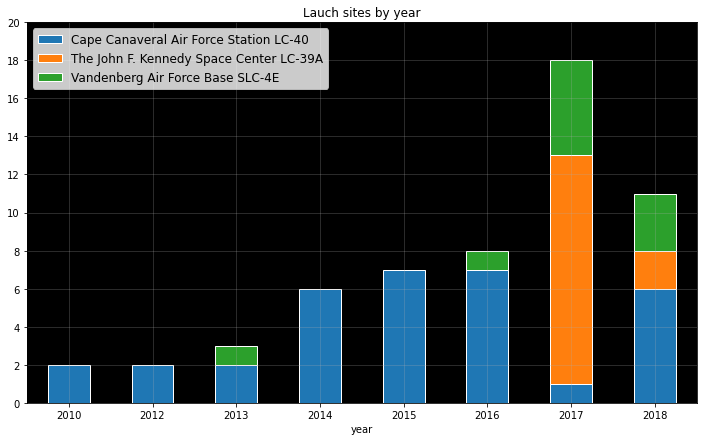

In [13]:
ly = pd.crosstab(spaceData["year"],spaceData["Launch_site_f"])
ax = ly.plot(kind="bar",stacked=True,figsize=(12,7),
             linewidth=1,
             edgecolor="w"*spaceData["year"].nunique(),
             alpha  = 1)
plt.xticks(rotation=0)
plt.legend(loc="upper left",prop={"size":12})
plt.yticks(np.arange(0,22,2))
plt.grid(True,alpha=.3)
plt.title("Lauch sites by year")
ax.set_facecolor("k")
plt.show()

## Rocket configurations

C:\Users\Ritesh Bansal\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:1208: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



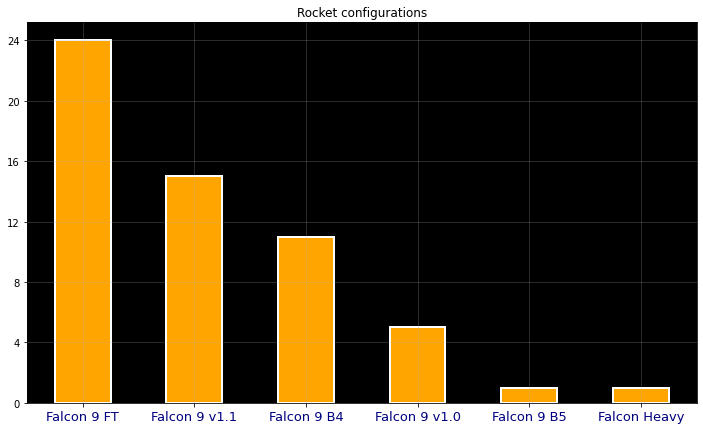

In [14]:
spaceData["booster"] = spaceData["Booster Version"].str.split(" ").str[1]
spaceData["booster"] = "Falcon 9 " + spaceData["booster"]
spaceData.loc[48,"booster"] = "Falcon Heavy"

plt.figure(figsize=(12,7))
ax = spaceData["booster"].value_counts().plot(kind="bar",
                                               color="Orange",
                                               linewidth=2,
                                               edgecolor="w"*spaceData["booster"].nunique())
plt.xticks(rotation=0,fontsize=13,color="navy")
plt.yticks(np.arange(0,28,4))
plt.grid(True,alpha=.3)
plt.title("Rocket configurations")
ax.set_facecolor("k")
plt.show()

## Rocket configurations by year

C:\Users\Ritesh Bansal\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:1208: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



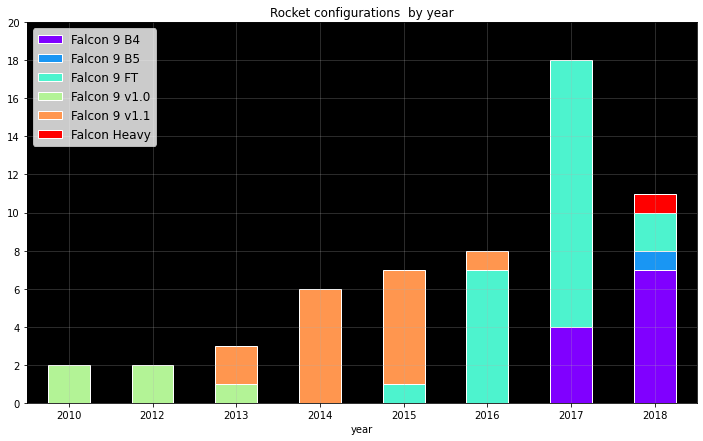

In [15]:
by = pd.crosstab(spaceData["year"],spaceData["booster"])
ax = by.plot(kind="bar",stacked=True,
             figsize=(12,7),colormap="rainbow",
             linewidth=1,edgecolor="w"*spaceData["year"].nunique())
plt.xticks(rotation=0)
plt.legend(loc="upper left",prop={"size":12})
plt.yticks(np.arange(0,22,2))
plt.grid(True,alpha=.3)
plt.title("Rocket configurations  by year")
ax.set_facecolor("k")
plt.show()

## Tesla Roadster Payload

,launch_attribute,details
0,Flight Number,FH 1
1,Date,2018-02-06 00:00:00
2,Time (UTC),20:45:00
3,Booster Version,"B1023.2 (side) , Heavy core B1033, B1025.2 (side)"
4,Launch Site,KSC LC-39A
5,Payload,Elon Musk's Tesla Roadster
6,Payload Mass (kg),"~1,250"
7,Orbit,Heliocentric 0.99–1.67 AU (close to Mars transfer orbit)
8,Customer,SpaceX
9,Mission Outcome,Success


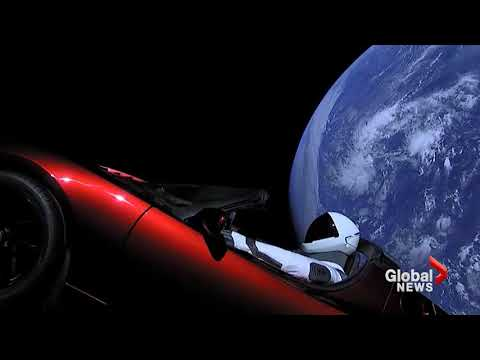

In [16]:
tes = spaceData[spaceData["Payload"] == "Elon Musk's Tesla Roadster"].transpose().reset_index()[:12]
tes.columns = ["launch_attribute","details"]
tes = tes.style.set_properties(**{"background-color":"red",
                                "color":"white",
                                "border-color":"white"}).set_caption("Elon Musk's Tesla Roadster")
display(tes)
YouTubeVideo("q_WQ-Ds8ZvE",width=700,heith=400)

## Payload word cloud

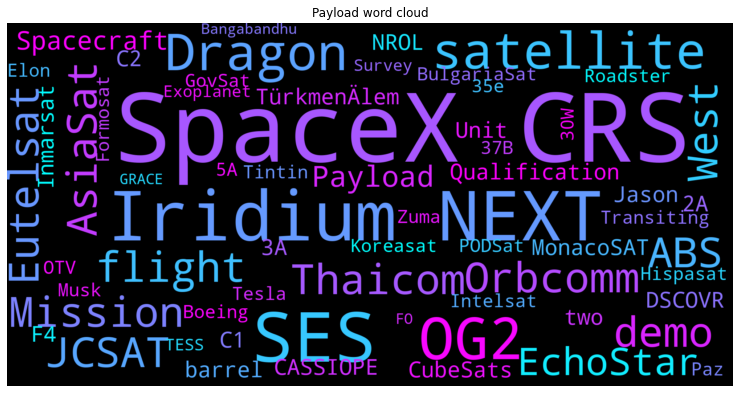

In [17]:
wrds = spaceData[["Payload"]]

plt.figure(figsize=(13,8))
wc = WordCloud(scale=5,background_color="black",
               colormap="cool",margin=True).generate(str(wrds))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Payload word cloud")
plt.show()

## Launching orbits for space crafts

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1627: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



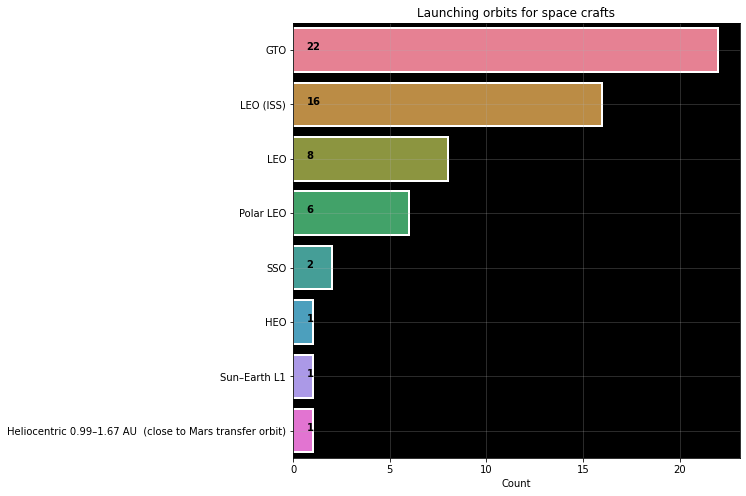

In [18]:
plt.figure(figsize=(8,8))
orb = spaceData["Orbit"].value_counts().reset_index()

ax  = sb.barplot("Orbit","index",
                  data=orb,
                  linewidth=2,
                  edgecolor="w"*len(orb),
                  palette = "husl")
ax.set_facecolor("k")
plt.xlabel("Count")
plt.ylabel("")
plt.grid(True,alpha=.3)

for i,j in enumerate(orb["Orbit"].values):
    ax.text(.7,i,j,weight="bold",fontsize=10)

plt.title("Launching orbits for space crafts")
plt.show()

## Word cloud for spaceX customers

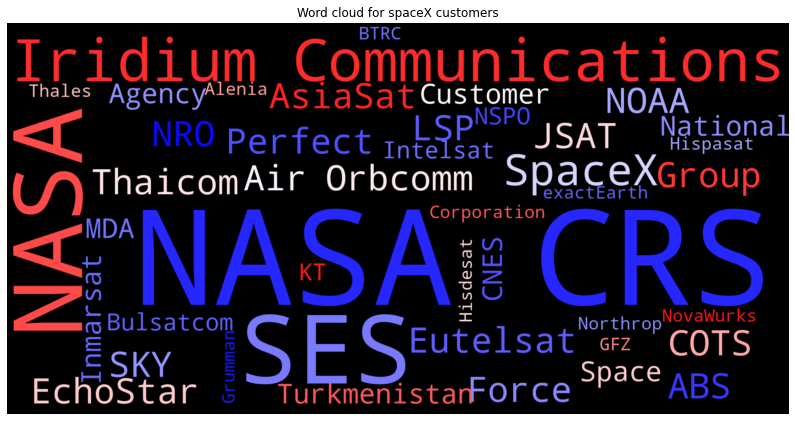

In [19]:
wrds1 = spaceData[["Customer"]]

plt.figure(figsize=(14,8))
wc1   = WordCloud(scale=5,background_color="black",colormap="bwr").generate(str(wrds1))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud for spaceX customers")
plt.show()